In [1]:
!pip install xarray matplotlib rasterio pyproj gdal geopandas shapely

In [2]:
!pip install imageio

In [1]:
import os
from osgeo import gdal
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = xr.open_dataset('daymet_v4_daily_na_tmin_2000.nc')

In [3]:
print(data)

<xarray.Dataset>
Dimensions:                  (x: 7814, y: 8075, time: 365, nv: 2)
Coordinates:
  * x                        (x) float32 -4.56e+06 -4.559e+06 ... 3.253e+06
  * y                        (y) float32 4.984e+06 4.983e+06 ... -3.09e+06
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
  * time                     (time) datetime64[ns] 2000-01-01T12:00:00 ... 20...
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 ...
    tmin                     (time, y, x) float32 ...
Attributes:
    start_year:        2000
    source:            Daymet Software Version 4.0
    Version_software:  Daymet Software Version 4.0
    Version_data:      Daymet Data Version 4.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Plea

In [7]:
variable_names = data.variables.keys()
print(variable_names)

KeysView(Frozen({'x': <xarray.IndexVariable 'x' (x: 7814)>
array([-4560250., -4559250., -4558250., ...,  3250750.,  3251750.,  3252750.],
      dtype=float32)
Attributes:
    units:          m
    long_name:      x coordinate of projection
    standard_name:  projection_x_coordinate, 'y': <xarray.IndexVariable 'y' (y: 8075)>
array([ 4984000.,  4983000.,  4982000., ..., -3088000., -3089000., -3090000.],
      dtype=float32)
Attributes:
    units:          m
    long_name:      y coordinate of projection
    standard_name:  projection_y_coordinate, 'lat': <xarray.Variable (y: 8075, x: 7814)>
[63098050 values with dtype=float32]
Attributes:
    units:          degrees_north
    long_name:      latitude coordinate
    standard_name:  latitude, 'lon': <xarray.Variable (y: 8075, x: 7814)>
[63098050 values with dtype=float32]
Attributes:
    units:          degrees_east
    long_name:      longitude coordinate
    standard_name:  longitude, 'time': <xarray.IndexVariable 'time' (time: 365)>
ar

In [ ]:
# x_values = data['x'].values
# y_values = data['y'].values
# lat_values = data['lat'].values
# lon_values = data['lon'].values
# time_values = data['time'].values
# yearday_values = data['yearday'].values
# time_bnds_values = data['time_bnds'].values
# lambert_conformal_conic_values = data['lambert_conformal_conic'].values
# tmin_values = data['tmin'].values


In [8]:
# Open the dataset with chunking
data = xr.open_dataset('daymet_v4_daily_na_tmin_2000.nc', chunks={'time': 1})

# Select a subset of the data
subset = data.isel(time=slice(0, 10), x=slice(0, 1000), y=slice(0, 1000))

# Now when you access the 'tmin' variable, it will be a Dask array
tmin_values = subset['tmin'].data  # This is now a Dask array

# You can perform operations on this array as if it were a numpy array
# Dask will automatically handle the chunking for you
# mean_tmin = tmin_values.mean().compute()  # This computes the mean of the 'tmin' variable
import dask.array as da

# Compute the mean while ignoring 'nan' values
mean_tmin = da.nanmean(tmin_values).compute()



In [4]:
import xarray as xr

# Open the dataset with chunking
# data = xr.open_dataset('daymet_v4_daily_na_tmin_2000.nc', chunks={'time': 10, 'x': 1000, 'y': 1000})

# Now when you access the 'tmin' variable, it will be a Dask array
tmin_values = data['tmin'].data  # This is now a Dask array

# You can perform operations on this array as if it were a numpy array
# Dask will automatically handle the chunking for you
mean_tmin = tmin_values.mean().compute()  # This computes the mean of the 'tmin' variable


MemoryError: Unable to allocate 85.8 GiB for an array with shape (365, 8075, 7814) and data type float32

In [4]:
data = xr.open_dataset('daymet_v4_daily_na_tmin_2000.nc')

In [ ]:
# # Calculate the daily average precipitation
# daily_avg_tmin = data['tmin'].mean(dim=['x', 'y'])

# # Plotting
# daily_avg_prcp.plot()
# plt.title('Average Daily Minimum Temperature in North America (2001)')
# plt.show()

In [5]:
import numpy as np

def get_city_data(dataset, city_lat, city_lon):
    """
    Get data for the grid cell that contains a given city.
    """
    # Compute the absolute difference between the city's coordinates and every point in the lat/lon arrays
    lat_diff = np.abs(dataset['lat'] - city_lat)
    lon_diff = np.abs(dataset['lon'] - city_lon)

    # Find the indices of the minimum difference (i.e., the closest lat/lon)
    min_coord = (np.abs(lat_diff + lon_diff)).argmin(dim=['x', 'y'])

    # Use these indices to select the data for the city's grid cell
    city_data = dataset.isel(x=min_coord['x'], y=min_coord['y'])

    return city_data

# Usage:
denton_data = get_city_data(data, 33.21, -97.13)

In [114]:
denton_data

<xarray.Dataset>
Dimensions:                  (time: 365, nv: 2)
Coordinates:
    x                        float32 2.588e+05
    y                        float32 -9.84e+05
    lat                      float32 33.21
    lon                      float32 -97.13
  * time                     (time) datetime64[ns] 2000-01-01T12:00:00 ... 20...
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 ...
    tmin                     (time) float32 ...
Attributes:
    start_year:        2000
    source:            Daymet Software Version 4.0
    Version_software:  Daymet Software Version 4.0
    Version_data:      Daymet Data Version 4.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...

In [6]:
denton_data

<xarray.Dataset>
Dimensions:                  (time: 365, nv: 2)
Coordinates:
    x                        float32 2.588e+05
    y                        float32 -9.84e+05
    lat                      float32 33.21
    lon                      float32 -97.13
  * time                     (time) datetime64[ns] 2000-01-01T12:00:00 ... 20...
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 ...
    tmin                     (time) float32 ...
Attributes:
    start_year:        2000
    source:            Daymet Software Version 4.0
    Version_software:  Daymet Software Version 4.0
    Version_data:      Daymet Data Version 4.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...

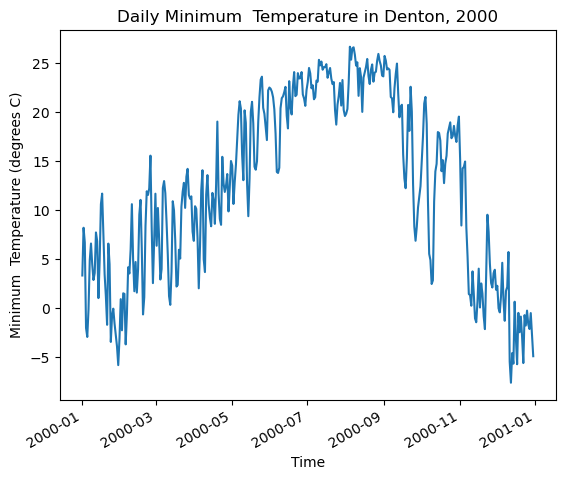

In [18]:
# Plot the precipitation data for Honolulu
denton_data['tmin'].plot()

# Add a title and labels to the plot
plt.title('Daily Minimum  Temperature in Denton, 2000')
plt.xlabel('Time')
plt.ylabel('Minimum  Temperature (degrees C)')

# Show the plot
plt.show()

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np

# Define the dimensions and coordinates
dims = ['time', 'y', 'x']

# Assuming 'x', 'y', 'lat', 'lon' are 1D arrays with the same length
x = np.linspace(-4.56e+06, 3.253e+06, num=100)  # replace with your actual data
y = np.linspace(4.984e+06, -3.09e+06, num=100)  # replace with your actual data
lat = np.linspace(33.21, 33.21, num=100)  # replace with your actual data
lon = np.linspace(-97.13, -97.13, num=100)  # replace with your actual data

coords = {
    'x': ('x', x),
    'y': ('y', y),
    'lat': ('y', lat),
    'lon': ('x', lon),
    'time': pd.date_range(start='2000-01-01', end='2000-12-31', freq='D'),
}

# Create the Dataset
denton_data = xr.Dataset(
    coords=coords,
    attrs={
        'start_year': 2000,
        'source': 'Daymet Software Version 4.0',
        'Version_software': 'Daymet Software Version 4.0',
        'Version_data': 'Daymet Data Version 4.0',
        'Conventions': 'CF-1.6',
        'citation': 'Please see http://daymet.ornl.gov/ for current Daymet data citation information',
        'references': 'Please see http://daymet.ornl.gov/ for current information on Daymet references'
    }
)

# Add the data variables to the Dataset
# Replace with your actual data
yearday_data = np.random.randint(1, 367, size=366)  # changed to 366 to match the 'time' dimension
time_bnds_data = np.random.randint(1, 367, size=(366, 2))  # changed to 366 to match the 'time' dimension
lambert_conformal_conic_data = 1  # replace with your actual data
tmin_data = np.random.rand(366, 100, 100)  # changed to 366 to match the 'time' dimension

denton_data['yearday'] = xr.DataArray(yearday_data, dims='time')
denton_data['time_bnds'] = xr.DataArray(time_bnds_data, dims=('time', 'nv'))
denton_data['lambert_conformal_conic'] = xr.DataArray(lambert_conformal_conic_data)
denton_data['tmin'] = xr.DataArray(tmin_data, dims=dims)

# Print the corrected denton_data
print(denton_data)


In [ ]:

!pip install --upgrade --user xarray pandas



In [ ]:
!pip install pandas==1.0.5


In [ ]:
!pip install --upgrade xarray


In [ ]:
import pandas as pd
import xarray as xr

print(pd.__version__)
print(xr.__version__)


In [19]:
# Calculate the monthly average temperature
# monthly_average = denton_data['tmin']
# Calculate the monthly average temperature
monthly_average = denton_data['tmin'].resample(time='1MS').mean('time')


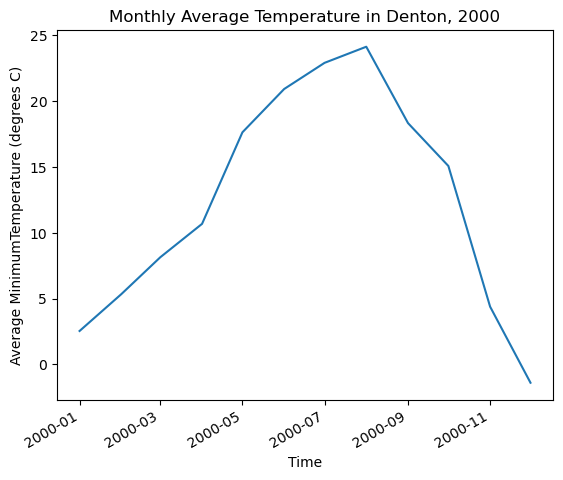

In [20]:
# Plot the monthly average temperature
monthly_average.plot()

# Add a title and labels to the plot
plt.title('Monthly Average Temperature in Denton, 2000')
plt.xlabel('Time')
plt.ylabel('Average MinimumTemperature (degrees C)')

# Show the plot
plt.show()

In [21]:
print(data['lambert_conformal_conic'])

<xarray.DataArray 'lambert_conformal_conic' ()>
[1 values with dtype=int16]
Attributes:
    grid_mapping_name:              lambert_conformal_conic
    longitude_of_central_meridian:  -100.0
    latitude_of_projection_origin:  42.5
    false_easting:                  0.0
    false_northing:                 0.0
    standard_parallel:              [25. 60.]
    semi_major_axis:                6378137.0
    inverse_flattening:             298.257223563


In [22]:
import os
import rasterio
from rasterio.transform import from_origin
from datetime import datetime

In [26]:
# Define the CRS
crs = '+proj=lcc +lat_1=25 +lat_2=60 +lat_0=42.5 +lon_0=-100 +x_0=0 +y_0=0 +a=6378137 +rf=298.257223563 +units=m +no_defs'

# Create a directory for the year

os.makedirs('E://2000', exist_ok=True)

# Loop through each day in the dataset
for i in range(len(data['time'])):
    # Get the data for the current day
    day_data = data['tmin'].isel(time=i)

    # Get the current date
    current_date = data['time'].isel(time=i).values
    current_date = pd.to_datetime(current_date)

    
    # Define the transformation
    transform = from_origin(day_data['x'].min(), day_data['y'].max(), abs(day_data['x'][1] - day_data['x'][0]), abs(day_data['y'][1] - day_data['y'][0]))

    # Open a new GeoTIFF file to write the data to
    with rasterio.open(f'E://2000//daymet_v4_daily_na_tmin_{current_date.year}_{str(current_date.month).zfill(2)}_{str(current_date.day).zfill(2)}.tif', 'w', driver='GTiff',
                       height=day_data.shape[0], width=day_data.shape[1],
                       count=1, dtype=str(day_data.dtype),
                       crs=crs,
                       transform=transform) as dst:
        dst.write(day_data.values, 1)

In [30]:
from pyproj import Transformer

def get_minimum_temperature_at_location(filename, lon, lat):
    with rasterio.open(filename) as src:
        # Define source CRS (WGS84)
        in_proj = 'epsg:4326'  # WGS84

        # Define target CRS (from raster file)
        out_proj = src.crs

        # Transformer to convert between the coordinate systems
        transformer = Transformer.from_crs(in_proj, out_proj, always_xy=True)

        # Reproject coordinates
        lon, lat = transformer.transform(lon, lat)

        # Get the pixel coordinates
        row, col = src.index(lon, lat)

        # Sample the data
        data = src.read(1)
        print(src.crs)
        print(f"lon: {lon}, lat: {lat}, row: {row}, col: {col}")

        # Check if row, col is within data bounds
        if 0 <= row < data.shape[0] and 0 <= col < data.shape[1]:
            return data[row, col]
        else:
            return None

# Test the function
filename = 'E://2000/daymet_v4_daily_na_tmin_2000_04_17.tif'
lon = -97.13
lat = 33.21
minimum_temperature = get_minimum_temperature_at_location(filename, lon, lat)
print(minimum_temperature)

PROJCS["unknown",GEOGCS["unknown",DATUM["unknown",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",42.5],PARAMETER["central_meridian",-100],PARAMETER["standard_parallel_1",25],PARAMETER["standard_parallel_2",60],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
lon: 258918.13197970696, lat: -984134.0226857077, row: 5968, col: 4819
8.61


In [27]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Load the shapefile
# Load the world map shapefile from the Natural Earth dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to only include North America
north_america = world[world['continent'] == 'North America']

# Define the grid size in kilometers
grid_size = 0.5

# Determine the bounding box of the shapefile
bbox = north_america.total_bounds

# Define the grid extent
min_x, min_y, max_x, max_y = bbox
x_range = max_x - min_x
y_range = max_y - min_y

# Calculate the number of grid cells in each dimension
num_cells_x = int(x_range / grid_size)
num_cells_y = int(y_range / grid_size)

# Create the grid points
grid_points = []
for i in range(num_cells_x):
    for j in range(num_cells_y):
        x = min_x + (i + 0.5) * grid_size
        y = min_y + (j + 0.5) * grid_size
        point = Point(x, y)
        grid_points.append(point)

# Create the grid polygons
grid_polygons = [Polygon.from_bounds(point.x - grid_size / 2, point.y - grid_size / 2,
                                     point.x + grid_size / 2, point.y + grid_size / 2)
                 for point in grid_points]

# Convert grid polygons to GeoDataFrame
grid_gdf = gpd.GeoDataFrame(geometry=grid_polygons)
grid_gdf.crs = north_america.crs  # Assign CRS to grid_gdf

# Perform spatial intersection
intersection = gpd.overlay(north_america, grid_gdf, how='intersection')

# Save the resulting grid
intersection.to_file('regrid.shp')

C:\Users\wwwdo\AppData\Local\Temp\ipykernel_15204\167611992.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

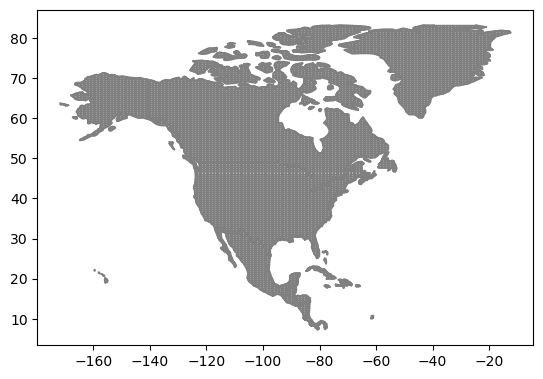

In [28]:
grsm_poly = gpd.read_file('regrid.shp')
grsm_poly.plot(color='white', edgecolor='grey')

In [7]:


import os
import xarray as xr

# Load the Daymet netCDF file
daymet_file = "daymet_v4_daily_na_tmin_2000.nc"
daymet_data = xr.open_dataset(daymet_file)

# Extract the necessary variables (e.g., latitude, longitude, and minimum temperature)
latitudes = daymet_data['lat']
longitudes = daymet_data['lon']
max_temps = daymet_data['tmin']

# Create a directory to store the daily files
output_dir = "E://2000TMINNCFILES"
os.makedirs(output_dir, exist_ok=True)

# Split the data into individual days and save each day as a separate netCDF file
time_dim = max_temps.dims[0]
time_coords = max_temps.coords[time_dim]
for i, time_value in enumerate(time_coords):
    day_data = max_temps.sel(**{time_dim: time_value})
    output_file = os.path.join(output_dir, f"day{i+1}.nc")
    day_data.to_netcdf(output_file)

# Close the Daymet netCDF dataset
daymet_data.close()



In [35]:
print(daymet_data)

<xarray.Dataset>
Dimensions:  (x: 7814, y: 8075)
Coordinates:
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06
    lat      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    time     datetime64[ns] ...
Data variables:
    tmin     (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>


In [39]:
# # Stack 'x' and 'y' into a single dimension 'points'
# stacked_daymet_data = daymet_data.stack(points=('x', 'y'))

# # Set 'lon' and 'lat' as coordinates
# stacked_daymet_data = stacked_daymet_data.set_coords(['lon', 'lat'])

# # Extract the minimum temperature values for the grid cells
# merged['tmin'] = [stacked_daymet_data['tmin'].interp(lon=lon, lat=lat).item()
#                   for lon, lat in zip(merged.geometry.centroid.x, merged.geometry.centroid.y)]


In [40]:
# # Stack 'x' and 'y' into a single dimension 'points'
# stacked_daymet_data = daymet_data.stack(points=('x', 'y'))

# # Set 'lon' and 'lat' as coordinates
# stacked_daymet_data = stacked_daymet_data.set_coords(['lon', 'lat'])

# # Extract the minimum temperature values for the grid cells
# merged['tmin'] = [stacked_daymet_data['tmin'].interp(lon=lon, lat=lat).item()
#                   for lon, lat in zip(merged.geometry.centroid.x, merged.geometry.centroid.y)]


In [41]:
# # Extract the minimum temperature values for the grid cells
# merged['tmin'] = [daymet_data['tmin'].interp(lon=lon, lat=lat).item()
#                   for lon, lat in zip(merged.geometry.centroid.x, merged.geometry.centroid.y)]


In [42]:
# # Set 'lon' and 'lat' as indexes
# daymet_data = daymet_data.set_index({"lon": "lon", "lat": "lat"})


In [43]:
# # Open the dataset using chunks
# daymet_data = xr.open_dataset(daymet_file, chunks={'lat': 100, 'lon': 100})

# # Set 'lon' and 'lat' as indexes
# daymet_data = daymet_data.set_index({"lon", "lat"})

# # Continue with the rest of your code...


In [9]:
!pip install matplotlib geopandas xarray cartopy


                                              0.0/10.9 MB ? eta -:--:--
                                             0.0/10.9 MB 960.0 kB/s eta 0:00:12
                                              0.1/10.9 MB 1.4 MB/s eta 0:00:08
     -                                        0.3/10.9 MB 2.4 MB/s eta 0:00:05
     --                                       0.6/10.9 MB 3.2 MB/s eta 0:00:04
     ---                                      1.0/10.9 MB 4.5 MB/s eta 0:00:03
     -----                                    1.5/10.9 MB 5.5 MB/s eta 0:00:02
     -------                                  2.0/10.9 MB 6.2 MB/s eta 0:00:02
     --------                                 2.4/10.9 MB 6.6 MB/s eta 0:00:02
     ----------                               2.9/10.9 MB 7.1 MB/s eta 0:00:02
     ------------                             3.4/10.9 MB 7.5 MB/s eta 0:00:02
     ------------                             3.5/10.9 MB 7.4 MB/s eta 0:00:01
     --------------                           3.9/10.9 MB 

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [286 lines of output]
  <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_version.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\__init__.py -> build\lib.win-amd64-cpython-310\cartopy
  

  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Failed to build cartopy


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [286 lines of output]
  <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_version.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\__init__.py -> build\lib.win-amd64-cpython-310\cartopy
  

In [11]:
!pip install cartopy


  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Failed to build cartopy


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [286 lines of output]
  <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_version.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\__init__.py -> build\lib.win-amd64-cpython-310\cartopy
  

In [13]:
import os
os.environ['GEOS_DIR'] = '<path_to_geos_installation_directory>'


In [14]:
!pip install cartopy


  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Failed to build cartopy


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [286 lines of output]
  <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_version.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\__init__.py -> build\lib.win-amd64-cpython-310\cartopy
  

In [16]:
import os
os.environ['GEOS_DIR'] = 'C:\Program Files\GEOS'

!pip install cartopy


  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Failed to build cartopy


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [286 lines of output]
  <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_version.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\__init__.py -> build\lib.win-amd64-cpython-310\cartopy
  

In [ ]:
# Required Libraries
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# Shapefile
shapefile = gpd.read_file("regrid.shp")

# Load NetCDF data
data = xr.open_dataset('E:/2000TMINNCFILES/day1.nc')

# Convert to Celsius
data['tmin'] = data.tmin - 273.15

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add Shapefile boundaries
shape_feature = ShapelyFeature(Reader('regrid.shp').geometries(),
                                ccrs.PlateCarree(), edgecolor='black')
ax.add_feature(shape_feature)

# Plot temperature
data.tmin.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5}, cmap='coolwarm')

# Save as PNG
plt.savefig("day1.png")

plt.show()


In [19]:
import os
os.environ['GEOS_DIR'] = r'C:\Users\wwwdo\anaconda3\geos'


In [6]:
# !pip install cartopy


In [21]:
import os
geos_dir = os.environ.get('GEOS_DIR')
print(geos_dir)


C:\Users\wwwdo\anaconda3\geos


In [7]:
# !pip install --no-binary cartopy cartopy


In [24]:
!conda list geos


# packages in environment at C:\Users\wwwdo\anaconda3:
#
# Name                    Version                   Build  Channel
geos                      3.8.0                h33f27b4_0  


In [25]:
!conda update geos


^C


In [27]:
!conda update --all


^C


In [ ]:
!conda update -c conda-forge geos


In [26]:
import os
os.environ['GEOS_DIR'] = r'C:\Users\wwwdo\anaconda3'


In [ ]:
!pip install cartopy

In [44]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import xarray as xr


In [45]:

# Load the Daymet netCDF file
daymet_file = "E:/2000TMINNCFILES/day1.nc"

In [46]:
# Open the dataset using chunks
daymet_data = xr.open_dataset(daymet_file, chunks={'lat': 100, 'lon': 100})

In [71]:
print(daymet_data)

<xarray.Dataset>
Dimensions:  (x: 7814, y: 8075)
Coordinates:
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06
    lat      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    time     datetime64[ns] ...
Data variables:
    tmin     (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>


In [61]:


# Extract the necessary variables (e.g., latitude, longitude, and minimum temperature)
latitudes = daymet_data['lat']
longitudes = daymet_data['lon']
min_temps = daymet_data['tmin']

In [68]:
print(latitudes)

<xarray.DataArray 'lat' (y: 8075, x: 7814)>
dask.array<open_dataset-lat, shape=(8075, 7814), dtype=float32, chunksize=(8075, 7814), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06
    lat      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    time     datetime64[ns] ...
Attributes:
    units:          degrees_north
    long_name:      latitude coordinate
    standard_name:  latitude


In [69]:
print(longitudes)

<xarray.DataArray 'lon' (y: 8075, x: 7814)>
dask.array<open_dataset-lon, shape=(8075, 7814), dtype=float32, chunksize=(8075, 7814), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06
    lat      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    time     datetime64[ns] ...
Attributes:
    units:          degrees_east
    long_name:      longitude coordinate
    standard_name:  longitude


In [62]:
print(min_temps)

<xarray.DataArray 'tmin' (y: 8075, x: 7814)>
dask.array<open_dataset-tmin, shape=(8075, 7814), dtype=float32, chunksize=(8075, 7814), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float32 -4.56e+06 -4.559e+06 -4.558e+06 ... 3.252e+06 3.253e+06
  * y        (y) float32 4.984e+06 4.983e+06 4.982e+06 ... -3.089e+06 -3.09e+06
    lat      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(8075, 7814), meta=np.ndarray>
    time     datetime64[ns] ...
Attributes:
    long_name:     daily minimum temperature
    units:         degrees C
    grid_mapping:  lambert_conformal_conic
    cell_methods:  area: mean time: minimum


In [48]:


# Compute the minimum and minimum values of latitudes and longitudes
min_x, min_y = float(longitudes.min()), float(latitudes.min())
max_x, max_y = float(longitudes.max()), float(latitudes.max())


In [49]:

# Define the grid size in degrees
grid_resolution = 0.5

In [50]:

# Create the grid points
grid_points = []
for i in np.arange(min_x, max_x, grid_resolution):
    for j in np.arange(min_y, max_y, grid_resolution):
        grid_points.append((i, j))


In [51]:

# Create the grid polygons
grid_polygons = []
for point in grid_points:
    lon, lat = point
    polygon = gpd.GeoSeries([Point(lon, lat).buffer(grid_resolution/2)])
    grid_polygons.extend(polygon)

In [57]:
# Re-project geometries to a projected CRS
merged = merged.to_crs('EPSG:3395')  # Example using Mercator projection

# Now you can calculate centroids
centroids = merged.geometry.centroid


In [74]:
# from scipy.spatial import cKDTree

# # Create a KDTree from the lon and lat arrays
# lonlat = np.dstack([daymet_data.lon.values.ravel(), daymet_data.lat.values.ravel()])[0]
# tree = cKDTree(lonlat)

# # Define a function to find the nearest 'x' and 'y' indices for a given 'lon' and 'lat'
# def find_nearest_indices(lon, lat):
#     dist, idx = tree.query([lon, lat])
#     return np.unravel_index(idx, daymet_data.lon.shape)

# # Extract the minimum temperature values for the grid cells
# merged['tmin'] = [
#     daymet_data.tmin.isel(y=idx[0], x=idx[1]).item()
#     for idx in (find_nearest_indices(lon, lat) for lon, lat in zip(merged.geometry.centroid.x, merged.geometry.centroid.y))
# ]


In [75]:
# # Stack 'x' and 'y' dimensions into a new 'points' dimension
# stacked_daymet_data = daymet_data.stack(points=['x', 'y'])

# # Set 'lon' and 'lat' as coordinates
# stacked_daymet_data = stacked_daymet_data.set_coords(['lon', 'lat'])

# # Now you can use 'sel' method with 'lon' and 'lat'
# merged['tmin'] = [stacked_daymet_data['tmin'].sel(lon=lon, lat=lat, method='nearest').item()
#                   for lon, lat in zip(merged.geometry.centroid.x, merged.geometry.centroid.y)]


In [76]:
# def find_nearest_indices(array, value):
#     array = np.asarray(array)
#     idx = np.unravel_index(np.abs(array - value).argmin(), array.shape)
#     return idx

# # Extract the minimum temperature values for the grid cells
# merged['tmin'] = [
#     min_temps.isel(y=find_nearest_indices(latitudes, lat)[0], x=find_nearest_indices(longitudes, lon)[1]).item()
#     for lon, lat in zip(merged.geometry.centroid.x, merged.geometry.centroid.y)
# ]


In [77]:
# # Create a GeoDataFrame for the grid
# grid_gdf = gpd.GeoDataFrame(geometry=grid_polygons, crs='EPSG:4326')

# # Perform spatial join with the shapefile
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# merged = gpd.sjoin(world, grid_gdf, how='inner', op='intersects')

# # Extract the minimum temperature values for the grid cells
# merged['tmin'] = [
#     min_temps.sel(lon=grid_cell[1].geometry.centroid.x, lat=grid_cell[1].geometry.centroid.y, method='nearest').item()
#     for grid_cell in merged.iterrows()
# ]

# # Plot the minimum temperature values on the shapefile
# fig, ax = plt.subplots(figsize=(12, 8))
# merged.plot(column='tmin', cmap='coolwarm', linewidth=0.8, edgecolor='black', ax=ax)
# world.boundary.plot(ax=ax, linewidth=1.2, color='black')
# plt.title('Gridded Daymet Minimum Temperature on Natural Earth Shapefile')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.colorbar(label='Minimum Temperature')
# plt.show()


In [78]:
# daymet_file = "E:/2000TMINNCFILES/day1.nc"
# daymet_data = xr.open_dataset(daymet_file, chunks={'lat': 100, 'lon': 100})

# if 'lon' not in daymet_data.coords or 'lat' not in daymet_data.coords:
#     print("The 'lon' and/or 'lat' coordinates are not found in the DataArray.")
# else:
#     latitudes = daymet_data['lat']
#     longitudes = daymet_data['lon']
#     min_temps = daymet_data['tmin']

#     min_x, min_y = float(longitudes.min()), float(latitudes.min())
#     max_x, max_y = float(longitudes.max()), float(latitudes.max())

#     grid_resolution = 0.5

#     grid_points = []
#     for i in np.arange(min_x, max_x, grid_resolution):
#         for j in np.arange(min_y, max_y, grid_resolution):
#             grid_points.append((i, j))

#     grid_polygons = []
#     for point in grid_points:
#         lon, lat = point
#         polygon = gpd.GeoSeries([Point(lon, lat).buffer(grid_resolution / 2)])
#         grid_polygons.extend(polygon)

#     merged = gpd.sjoin(world, grid_gdf, how='inner', op='intersects')

#     merged['tmin'] = [
#         min_temps.sel(lon=grid_cell.geometry.centroid.x, lat=grid_cell.geometry.centroid.y, method='nearest').item()
#         for grid_cell in merged.iterrows()
#     ]

#     fig, ax = plt.subplots(figsize=(12, 8))
#     merged.plot(column='tmin', cmap='coolwarm', linewidth=0.8, edgecolor='black', ax=ax)
#     world.boundary.plot(ax=ax, linewidth=1.2, color='black')
#     plt.title('Gridded Daymet Minimum Temperature on Natural Earth Shapefile')
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
#     plt.colorbar(label='Minimum Temperature')
#     plt.show()


In [79]:
# # Load the Daymet netCDF file
# daymet_file = "E:/2000TMINNCFILES/day1.nc"# Open the dataset using chunks
# daymet_data = xr.open_dataset(daymet_file, chunks={'lat': 100, 'lon': 100})

# # Check if 'lon' and 'lat' are in the coordinates of the DataArray
# if 'lon' not in daymet_data.coords or 'lat' not in daymet_data.coords:
#     print("The 'lon' and/or 'lat' coordinates are not found in the DataArray.")
# else:
#     # Extract the necessary variables (e.g., latitude, longitude, and minimum temperature)
#     latitudes = daymet_data['lat']
#     longitudes = daymet_data['lon']
#     min_temps = daymet_data['tmin']

#     # Compute the minimum and minimum values of latitudes and longitudes
#     min_x, min_y = float(longitudes.min()), float(latitudes.min())
#     max_x, max_y = float(longitudes.max()), float(latitudes.max())

#     # Define the grid size in degrees
#     grid_resolution = 0.5

#     # Create the grid points
#     grid_points = []
#     for i in np.arange(min_x, max_x, grid_resolution):
#         for j in np.arange(min_y, max_y, grid_resolution):
#             grid_points.append((i, j))

#     # Create the grid polygons
#     grid_polygons = []
#     for point in grid_points:
#         lon, lat = point
#         polygon = gpd.GeoSeries([Point(lon, lat).buffer(grid_resolution/2)])
#         grid_polygons.extend(polygon)

#     # Re-project geometries to a projected CRS
#     merged = merged.to_crs('EPSG:3395')  # Example using Mercator projection

#     # Now you can calculate centroids
#     centroids = merged.geometry.centroid

#     # Create a GeoDataFrame for the grid
#     grid_gdf = gpd.GeoDataFrame(geometry=grid_polygons, crs='EPSG:4326')

#     # Perform spatial join with the shapefile
#     world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#     merged = gpd.sjoin(world, grid_gdf, how='inner', op='intersects')

#     # Extract the minimum temperature values for the grid cells
#     merged['tmin'] = [min_temps.sel(lon=lon, lat=lat, method='nearest').item()
#                       for lon, lat in zip(merged.geometry.centroid.x, merged.geometry.centroid.y)]

#     # Plot the minimum temperature values on the shapefile
#     fig, ax = plt.subplots(figsize=(12, 8))
#     merged.plot(column='tmin', cmap='coolwarm', linewidth=0.8, edgecolor='black', ax=ax)
#     world.boundary.plot(ax=ax, linewidth=1.2, color='black')
#     plt.title('Gridded Daymet Minimum Temperature on Natural Earth Shapefile')
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
#     plt.colorbar(label='Minimum Temperature')
#     plt.show()


In [80]:

# # Create a GeoDataFrame for the grid
# grid_gdf = gpd.GeoDataFrame(geometry=grid_polygons, crs='EPSG:4326')

# # Perform spatial join with the shapefile
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# merged = gpd.sjoin(world, grid_gdf, how='inner', op='intersects')

# # Extract the minimum temperature values for the grid cells
# merged['tmin'] = [min_temps.sel(lon=lon, lat=lat, method='nearest').item()
#                   for lon, lat in zip(merged.geometry.centroid.x, merged.geometry.centroid.y)]

# # Plot the minimum temperature values on the shapefile
# fig, ax = plt.subplots(figsize=(12, 8))
# merged.plot(column='tmin', cmap='coolwarm', linewidth=0.8, edgecolor='black', ax=ax)
# world.boundary.plot(ax=ax, linewidth=1.2, color='black')
# plt.title('Gridded Daymet Minimum Temperature on Natural Earth Shapefile')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.colorbar(label='Minimum Temperature')
# plt.show()


In [81]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

In [82]:
file_path = 'E:\\2000\daymet_v4_daily_na_tmin_2000_01_01.tif'
dataset = rasterio.open(file_path)

In [83]:
raster_data = dataset.read(1)  # Assuming you want to plot the first band
transform = dataset.transform  # Affine transformation for coordinate conversion

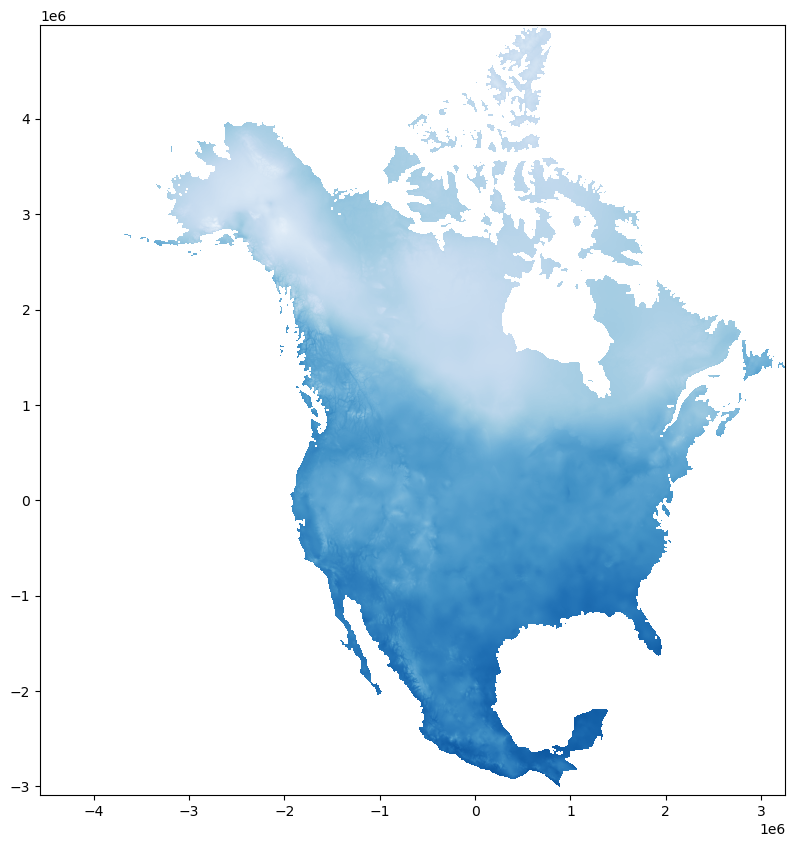

In [84]:
plt.figure(figsize=(10, 10))  # Set the figure size according to your preference
show(raster_data, transform=transform, cmap='Blues')  # Plot the raster data
plt.show()  # Display the plot

In [11]:
pip install rasterio matplotlib cartopy basemap

  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/487.2 kB ? eta -:--:--
     ----                                    61.4/487.2 kB 1.1 MB/s eta 0:00:01
     ---------------                        204.8/487.2 kB 2.1 MB/s eta 0:00:01
     ------------------------------------   471.0/487.2 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 487.2/487.2 kB 3.1 MB/s eta 0:00:00
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
                                              0.0/30.5 MB ? eta -:--:--
                                              0.6/30.5 MB 18.5 MB/s eta 0:00:02
     -                

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [286 lines of output]
  <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\_version.py -> build\lib.win-amd64-cpython-310\cartopy
  copying lib\cartopy\__init__.py -> build\lib.win-amd64-cpython-310\cartopy
  

In [86]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Load the shapefile
# Load the world map shapefile from the Natural Earth dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to only include North America
north_america = world[world['continent'] == 'North America']


# Define the grid size in kilometers
grid_size = 0.5

# Determine the bounding box of the shapefile
bbox = north_america.total_bounds

# Define the grid extent
min_x, min_y, max_x, max_y = bbox
x_range = max_x - min_x
y_range = max_y - min_y

# Calculate the number of grid cells in each dimension
num_cells_x = int(x_range / grid_size)
num_cells_y = int(y_range / grid_size)

# Create the grid points
grid_points = []
for i in range(num_cells_x):
    for j in range(num_cells_y):
        x = min_x + (i + 0.5) * grid_size
        y = min_y + (j + 0.5) * grid_size
        point = Point(x, y)
        grid_points.append(point)

# Create the grid polygons
grid_polygons = [Polygon.from_bounds(point.x - grid_size / 2, point.y - grid_size / 2,
                                     point.x + grid_size / 2, point.y + grid_size / 2)
                 for point in grid_points]

# Convert grid polygons to GeoDataFrame
grid_gdf = gpd.GeoDataFrame(geometry=grid_polygons)

# Perform spatial intersection
intersection = gpd.overlay(north_america, grid_gdf, how='intersection')

# Save the resulting grid
intersection.to_file('regrid.shp')

# User input for latitude and longitude
user_lat = float(input("Enter latitude: "))
user_lon = float(input("Enter longitude: "))

# Create a point for user input
user_point = Point(user_lon, user_lat)

# Clip the grid based on user input point
clipped_grid = grid_gdf[grid_gdf.geometry.contains(user_point)]

# Save the clipped grid
clipped_grid.to_file('clipped_grid.shp')

C:\Users\wwwdo\AppData\Local\Temp\ipykernel_15204\2482679291.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\wwwdo\AppData\Local\Temp\ipykernel_15204\2482679291.py:45: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  intersection = gpd.overlay(north_america, grid_gdf, how='intersection')


Enter latitude: 33.21
Enter longitude: -97.13


In [92]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import xarray as xr
from shapely import geometry

In [95]:

# Load the Daymet netCDF file
daymet_file = "E:/2000TMINNCFILES/day1.nc"

In [96]:
daymet_file

'E:/2000TMINNCFILES/day1.nc'

In [97]:

# Open the dataset using chunks
daymet_data = xr.open_dataset(daymet_file, chunks={'y': 100, 'x': 100})

In [100]:
# Extract the necessary variables (e.g., latitude, longitude, and minimum temperature)
latitudes = daymet_data['lat']
longitudes = daymet_data['lon']
min_temps = daymet_data['tmin']

In [101]:




# Compute the minimum and minimum values of latitudes and longitudes
min_x, min_y = float(longitudes.min()), float(latitudes.min())
max_x, max_y = float(longitudes.max()), float(latitudes.max())


In [102]:
print(min_x)
print(min_y)
print(max_x)
print(max_y)

-179.99989318847656
6.08138370513916
179.9999237060547
83.79330444335938


In [103]:

# Define the grid size in degrees
grid_resolution = 0.5

# Create the grid points
grid_points = []
for i in np.arange(min_x, max_x, grid_resolution):
    for j in np.arange(min_y, max_y, grid_resolution):
        grid_points.append((i, j))


In [104]:


# Create the grid polygons
grid_polygons = []
for point in grid_points:
    lon, lat = point
    polygon = geometry.Point(lon, lat).buffer(grid_resolution/2)
    grid_polygons.append(polygon)

In [105]:


# Create a GeoDataFrame for the grid
grid_gdf = gpd.GeoDataFrame(geometry=grid_polygons, crs='EPSG:4326')

# Perform spatial join with the shapefile of the USA
usa_shapefile = "regrid.shx"  # Replace with the actual path to the shapefile
usa = gpd.read_file(usa_shapefile)
merged = gpd.sjoin(usa, grid_gdf, how='inner', op='intersects')


C:\Users\wwwdo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [106]:

# Reproject merged geometry to a projected CRS for centroid calculation
merged = merged.to_crs('EPSG:3857')


In [107]:

# Compute the minimum temperature values for the grid cells
max_temp_values = [max_temps.sel(y=y, x=x, method='nearest').compute().item()
                  for x, y in zip(merged.geometry.centroid.x, merged.geometry.centroid.y)]

In [108]:


# Assign the computed minimum temperature values to the 'tmin' column
merged['tmin'] = max_temp_values

In [ ]:

# Plot the minimum temperature values on the USA shapefile
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='tmin', cmap='coolwarm', linewidth=0.8, edgecolor='black', ax=ax)
usa.boundary.plot(ax=ax, linewidth=1.2, color='black')
plt.title('Gridded Daymet Minimum Temperature on USA Shapefile')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Minimum Temperature')
plt.show()

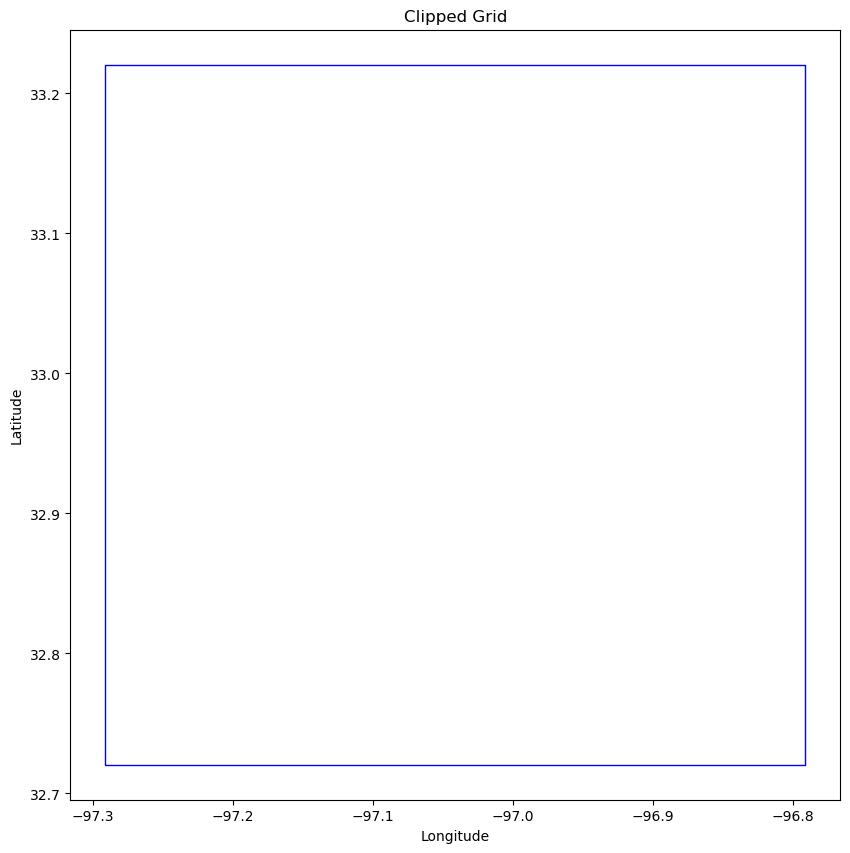

In [13]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import matplotlib.pyplot as plt

# Specify the paths to the clipped grid shapefile and Daymet .tif file
clipped_grid_file = "clipped_grid.shp"
daymet_file = 'E://2000/daymet_v4_daily_na_tmin_2000_01_01.tif'

# Read the clipped grid shapefile
clipped_grid = gpd.read_file(clipped_grid_file)

# Read the Daymet .tif file
with rasterio.open(daymet_file) as src:
    # Get the bounding box coordinates
    left, bottom, right, top = src.bounds

    # Create a bounding box geometry
    bounding_box = box(left, bottom, right, top)

    # Perform spatial intersection with the clipped grid
    intersection = gpd.overlay(clipped_grid, gpd.GeoDataFrame(geometry=[bounding_box]), how='intersection')

# Plot the clipped grid
fig, ax = plt.subplots(figsize=(10, 10))
clipped_grid.plot(ax=ax, facecolor='none', edgecolor='blue')

# Set plot title and axis labels
ax.set_title('Clipped Grid')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


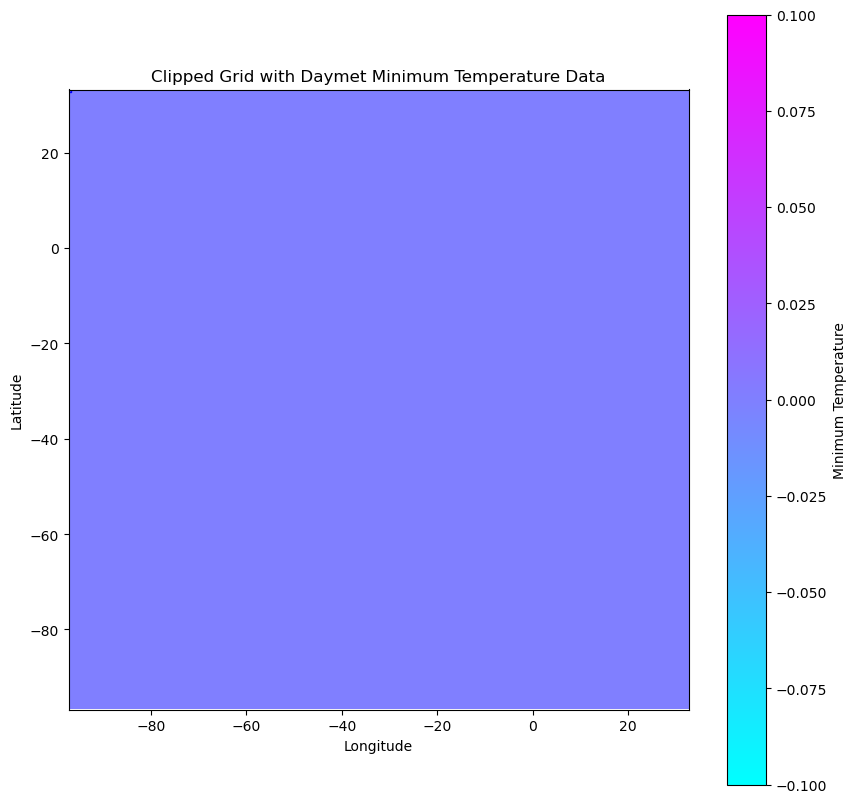

In [15]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import matplotlib.pyplot as plt

# Specify the paths to the clipped grid shapefile and Daymet .tif file
clipped_grid_file = "clipped_grid.shp"
daymet_file = 'E://2000/daymet_v4_daily_na_tmin_2000_01_01.tif'

# Read the clipped grid shapefile
clipped_grid = gpd.read_file(clipped_grid_file)

# Get the bounding box from the clipped grid
bounding_box = clipped_grid.total_bounds

# Read the Daymet .tif file
with rasterio.open(daymet_file) as src:
    # Perform spatial intersection with the clipped grid
    intersection = gpd.overlay(clipped_grid, gpd.GeoDataFrame(geometry=[box(*bounding_box)]), how='intersection')

    # Mask the Daymet data using the intersection geometry
    masked_data, _ = mask(src, [box(*bounding_box)], crop=False)

# Plot the clipped grid and overlay the Daymet data
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the clipped grid
clipped_grid.plot(ax=ax, facecolor='none', edgecolor='blue')

# Plot the Daymet data
im = ax.imshow(masked_data[0], cmap='cool', extent=bounding_box, origin='upper')

# Add a colorbar
cbar = plt.colorbar(im, ax=ax, label='Minimum Temperature')

# Set plot title and axis labels
ax.set_title('Clipped Grid with Daymet Minimum Temperature Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


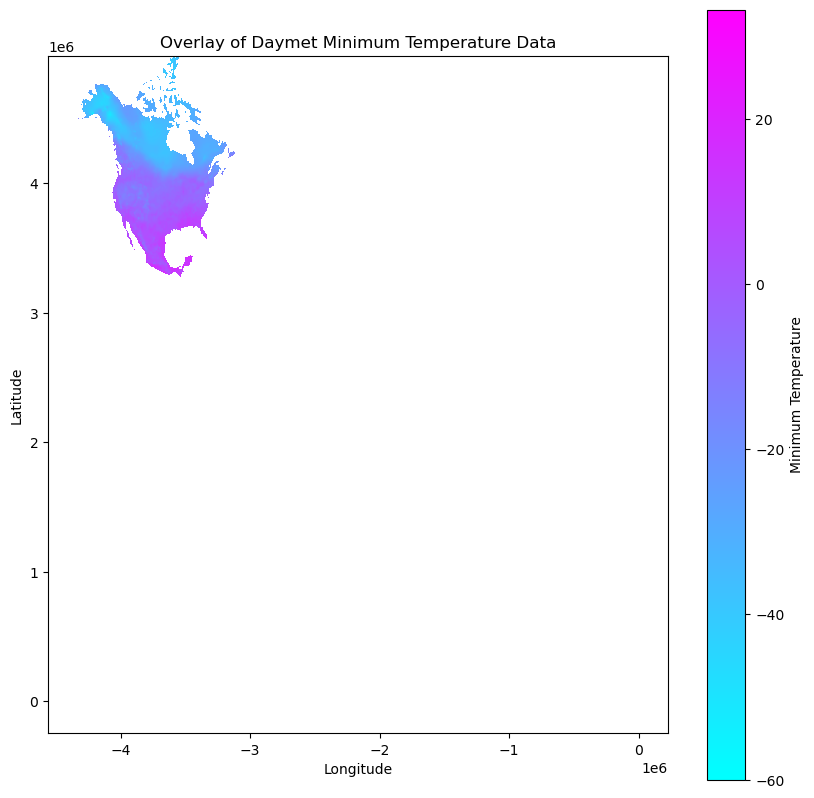

In [16]:
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd

# Specify the paths to the Daymet .tif file and the clipped grid shapefile
daymet_file = 'E://2000/daymet_v4_daily_na_tmin_2000_01_01.tif'
clipped_grid_file = "clipped_grid.shp"

# Read the Daymet raster data
with rasterio.open(daymet_file) as src:
    daymet_data = src.read(1)  # Read the first band

# Read the clipped grid shapefile
clipped_grid = gpd.read_file(clipped_grid_file)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Daymet data
im = ax.imshow(daymet_data, cmap='cool', extent=src.bounds, origin='upper')

# Plot the clipped grid polygons
clipped_grid.plot(ax=ax, facecolor='none', edgecolor='blue')

# Add a colorbar
cbar = plt.colorbar(im, ax=ax, label='Minimum Temperature')

# Set plot title and axis labels
ax.set_title('Overlay of Daymet Minimum Temperature Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr 

# Load the Daymet minimum temperature data
daymet_file = "daymet_v4_daily_na_tmin_2000.nc"
daymet_data = xr.open_dataset(daymet_file)

# Determine the correct dimension name for the Daymet data file
day_dim = daymet_data['tmin'].dims[0]

# Specify the day you want to overlay (e.g., day 1/365)
day_index = 1

# Extract the minimum temperature data for the specified day
max_temp_day = daymet_data['tmin'].isel(**{day_dim: day_index})

# Convert the xarray data to a pandas DataFrame
max_temp_day_df = max_temp_day.to_dataframe().reset_index()

# Convert the DataFrame to a GeoDataFrame, setting the geometry to points created from the lat/lon columns
gdf = gpd.GeoDataFrame(max_temp_day_df, geometry=gpd.points_from_xy(max_temp_day_df.lon, max_temp_day_df.lat))

# Load the clipped grid shapefile
clipped_grid_file = "clipped_grid.shp"
clipped_grid = gpd.read_file(clipped_grid_file)

# Perform spatial overlay between the clipped grid and Daymet data
overlay = gpd.overlay(clipped_grid, gdf, how='intersection')

# Plot the overlay
fig, ax = plt.subplots(figsize=(10, 10))
clipped_grid.boundary.plot(ax=ax, color='black')  # Plot the clipped grid boundary
overlay.plot(column='tmin', cmap='coolwarm', ax=ax, linewidth=0.5, edgecolor='black')  # Plot the overlay with temperature values
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Overlay of Daymet Minimum Temperature on Clipped Grid')
plt.colorbar(label='Minimum Temperature (°C)')
plt.show()


KeyboardInterrupt: 

In [17]:


import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Load the Daymet minimum temperature data
daymet_file = "daymet_v4_daily_na_tmin_2000.nc"
daymet_data = xr.open_dataset(daymet_file)

# Determine the correct dimension name for the Daymet data file
day_dim = daymet_data['tmin'].dims[0]

# Specify the day you want to overlay (e.g., day 1/365)
day_index = 0

# Extract the minimum temperature data for the specified day
max_temp_day = daymet_data['tmin'].isel(**{day_dim: day_index})

# Load the clipped grid shapefile
clipped_grid_file = "clipped_grid.shp"
clipped_grid = gpd.read_file(clipped_grid_file)

# Perform spatial overlay between the clipped grid and Daymet data
overlay = gpd.overlay(clipped_grid, max_temp_day.to_dataframe(), how='intersection')

# Plot the overlay
fig, ax = plt.subplots(figsize=(10, 10))
clipped_grid.boundary.plot(ax=ax, color='black')  # Plot the clipped grid boundary
overlay.plot(column='tmin', cmap='coolwarm', ax=ax, linewidth=0.5, edgecolor='black')  # Plot the overlay with temperature values
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Overlay of Daymet Minimum Temperature on Clipped Grid')
plt.colorbar(label='Minimum Temperature (°C)')
plt.show()



AttributeError: 'DataFrame' object has no attribute 'crs'

In [ ]:
!pip install --upgrade pyproj

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr

# Load the clipped grid shapefile
grid_poly = gpd.read_file('clipped_grid.shp')

# Load the fires data file (assuming you have it loaded as 'data')
data = xr.open_dataset('E://2000/daymet_v4_daily_na_tmin_2000_01_01.tif')

# Convert the xarray dataset to a GeoDataFrame
data_gdf = data.to_dataframe().reset_index()
data_gdf = gpd.GeoDataFrame(data_gdf, geometry=gpd.points_from_xy(data_gdf.longitude, data_gdf.latitude))

# Create a spatial intersection between the clipped grid and minimum temperature
minimum_temperatures_within_grid = gpd.overlay(grid_poly, data_gdf, how='intersection')

# Plotting the clipped grid and fires within the grid
fig, ax = plt.subplots(figsize=(40, 20))

# Plot the clipped grid
grid_poly.plot(ax=ax, color='white', edgecolor='black')

# Plot the fires within the grid
minimum_temperatures_within_grid.plot(ax=ax, marker='o', color='red', markersize=1)

# Set the aspect ratio and display the plot
ax.set_aspect("equal")
plt.show()


In [ ]:
data = xr.open_dataset('E://2000/daymet_v4_daily_na_tmin_2000_01_01.tif')
print(data)

In [ ]:
variable_names = data.variables.keys()
print(variable_names)

In [ ]:
import geopandas as gpd
import rasterio
import rasterio.mask
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Read the shapefile
grid_shapefile_path = 'clipped_grid.shp'
grid_data = gpd.read_file(grid_shapefile_path)

# Read the temperature data
temperature_tif_path = 'C:/Users/kumar/Wildfire Project/2000/daymet_v4_daily_na_tmin_2000_01_01.tif'
temperature_data = rasterio.open(temperature_tif_path)

# Function to get temperature value for a given latitude and longitude
def get_temperature(latitude, longitude):
    point = grid_data.contains(Point(longitude, latitude))
    intersected_grid = grid_data[point]
    geometry = intersected_grid.geometry.values[0]
    out_image, out_transform = rasterio.mask.mask(temperature_data, [geometry], crop=True)
    return out_image[0][0][0]

# Example usage
latitude = 33.21
longitude = -97.1
temperature = get_temperature(latitude, longitude)
print(f"Temperature at ({latitude}, {longitude}): {temperature} °C")

# Plot the grid and temperature data
fig, ax = plt.subplots(figsize=(10, 10))
grid_data.plot(ax=ax)
ax.imshow(temperature_data.read(1), cmap='hot', alpha=0.5)
plt.show()

In [ ]:
!pip install geopandas rasterio
import geopandas as gpd
import rasterio
from rasterio.plot import show
shapefile_path = "clipped_grid.shp"
north_america = gpd.read_file(shapefile_path)
tif_file_path = "C:/Users/kumar/Wildfire Project/2000/daymet_v4_daily_na_tmin_2000_01_01.tif"
daymet_data = rasterio.open(tif_file_path)
fig, ax = plt.subplots(figsize=(10, 10))
show((daymet_data, 1), ax=ax, cmap='hot')
plt.show()

In [8]:
!pip install matplotlib numpy netCDF4 geopandas pillow



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!conda install -c anaconda basemap
                                                       

^C


In [9]:
# Required Libraries
import os
import numpy as np
from netCDF4 import Dataset
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from PIL import Image

# Shapefile
shapefile = gpd.read_file("regrid.shp")

# Load NetCDF data
data = Dataset('E:/2000TMINNCFILES/day1.nc', mode='r')

# Get temperature
temp = data.variables['tmin'][:].squeeze()

# Get latitudes and longitudes from the data set
lats = data.variables['lat'][:]
lons = data.variables['lon'][:]

# Create the figure and basemap object
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lats), urcrnrlat=np.max(lats),
            llcrnrlon=np.min(lons), urcrnrlon=np.max(lons))
m.drawcoastlines()
m.drawcountries()

# Plot the temperature data
m.pcolormesh(lons, lats, temp, latlon=True, cmap='coolwarm')

# Overlay the shapefile
m.readshapefile("regrid", 'regrid')

# Add a colorbar
plt.colorbar(label='Temperature (K)')

# Save the figure
plt.savefig("day1.png")

# Close the figure
plt.close(fig)

# Close the NetCDF data set
data.close()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'